<a href="https://colab.research.google.com/github/gabrield03/cs131/blob/master/MiniProjectGroup7/ExtractData/Capstone_Project_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 7 Mini Project - Glassdoor Job Postings Analysis

Gabriel Larot, Thi Dao Nguyen Pham, and James Kim

# Import and display the dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
from matplotlib import colormaps
%matplotlib inline

!wget -O dsj.csv https://raw.githubusercontent.com/gabrield03/cs131/master/MiniProjectGroup7/DataScientist.csv

df0 = pd.read_csv("dsj.csv",encoding='latin-1')
df0

--2023-12-04 00:45:42--  https://raw.githubusercontent.com/gabrield03/cs131/master/MiniProjectGroup7/DataScientist.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14957616 (14M) [text/plain]
Saving to: ‘dsj.csv’

dsj.csv             100%[===================>]  14.26M  --.-KB/s    in 0.1s    

2023-12-04 00:45:42 (105 MB/s) - ‘dsj.csv’ saved [14957616/14957616]



,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, weâre on a missio...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,3904,4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
3905,3905,4376,Data Analyst Ã¢ Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3906,3906,4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
3907,3907,4378,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1


# Info for dataset

In [ ]:
df0.describe()

,Unnamed: 0,index,Rating,Founded
count,3909.000000,3909.000000,3909.000000,3909.000000
mean,1954.000000,2167.446662,3.283576,1479.154771
std,1128.575429,1247.657849,1.575749,855.750138
min,0.000000,0.000000,-1.000000,-1.000000
25%,977.000000,1121.000000,3.200000,1625.000000
50%,1954.000000,2161.000000,3.700000,1976.000000
75%,2931.000000,3249.000000,4.100000,2002.000000
max,3908.000000,4379.000000,5.000000,2020.000000


# Visualize the unique values from the columns

In [ ]:
for col in df0:
  unique_values = df0[col].unique()
  num_unique = df0[col].nunique()
  print(f"Column '{col}' has {num_unique} unique value(s): {unique_values}")

# Salary By Company Size

Bar Chart and Pie Chart for Salary vs Company Size

Note: Does not include "Unknown" and "-1" categories

--2023-12-04 00:45:43--  https://raw.githubusercontent.com/gabrield03/cs131/master/MiniProjectGroup7/ExtractData/SalaryBySizeSplit.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100053 (98K) [text/plain]
Saving to: ‘dsjob.csv’

dsjob.csv           100%[===================>]  97.71K  --.-KB/s    in 0.03s   

2023-12-04 00:45:43 (3.58 MB/s) - ‘dsjob.csv’ saved [100053/100053]



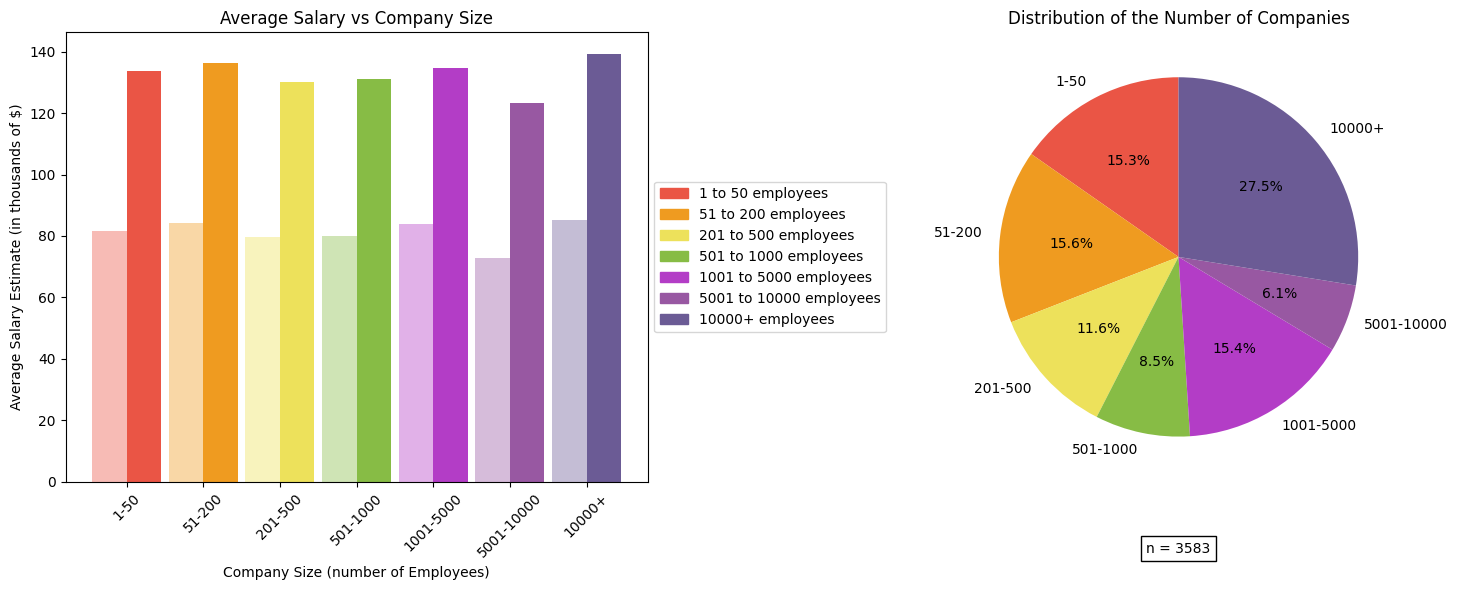

In [ ]:
!wget -O dsjob.csv https://raw.githubusercontent.com/gabrield03/cs131/master/MiniProjectGroup7/ExtractData/SalaryBySizeSplit.csv
df1 = pd.read_csv("dsjob.csv",encoding='latin-1')

# Categories for x-axis
categories = ['1 to 50 employees', '51 to 200 employees', '201 to 500 employees', '501 to 1000 employees',
              '1001 to 5000 employees', '5001 to 10000 employees', '10000+ employees']
new_x_labels = ['1-50', '51-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10000+']

avg_min_salaries = []
avg_max_salaries = []

# Count data points in each category
counts = [df1[df1['Company Size'] == category].shape[0] for category in categories]
total = sum(counts)

for category in categories:
    category_data = df1[df1['Company Size'] == category]
    avg_min_salaries.append(category_data['Min. Salary Estimate (in thousands of $)'].mean())
    avg_max_salaries.append(category_data['Max. Salary Estimate (in thousands of $)'].mean())

# Colors for the Bar and Pie Charts
max_salary_colors = [ (0.917, 0.333, 0.271), (0.937, 0.608, 0.125), (0.929, 0.882, 0.357), (0.529, 0.737, 0.271),
                      (0.702, 0.239, 0.776), (0.596, 0.345, 0.635), (0.420, 0.357, 0.584) ]

min_salary_colors = [clrs.to_rgb(color) for color in max_salary_colors]

# Make min. bars lighter
lighten_factor = 0.6
for i in range(len(min_salary_colors)):
    r, g, b = min_salary_colors[i]
    min_salary_colors[i] = (r + (1 - r) * lighten_factor, g + (1 - g) * lighten_factor, b + (1 - b) * lighten_factor)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar Chart
width = 0.45
x = range(len(categories))

bars = []
legend_colors = []
for i in range(len(categories)):
    bar = ax1.bar(i, avg_min_salaries[i], width, label='Min. Salary', color=min_salary_colors[i])
    bars.append(bar)
    bar = ax1.bar(i + width, avg_max_salaries[i], width, label='Max. Salary', color=max_salary_colors[i])
    legend_colors.append(plt.Rectangle((0, 0), 1, 1, color=max_salary_colors[i]))

ax1.set_title("Average Salary vs Company Size")
ax1.set_xlabel('Company Size (number of Employees)')
ax1.set_ylabel('Average Salary Estimate (in thousands of $)')
ax1.set_xticks([i + width/2 for i in x])
ax1.set_xticklabels(new_x_labels)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(legend_colors, categories, loc='center left', bbox_to_anchor=(1, 0.5))

# Pie chart
ax2.pie(counts, labels=new_x_labels, autopct='%1.1f%%', startangle=90, colors=max_salary_colors)
ax2.set_title('Distribution of the Number of Companies')
ax2.text(0.5, -0.15, f'n = {total}', ha='center', va='center', transform=ax2.transAxes, fontsize=10, bbox=dict(facecolor='none', edgecolor='black'))

plt.tight_layout()
plt.show()

#Highest and Lowest Salary By Company Size

Bar Chart and Pie Chart for Salary vs Company Size

Note: Does not include "Unknown" and "-1" categories

--2023-12-04 03:00:43--  https://raw.githubusercontent.com/gabrield03/cs131/master/MiniProjectGroup7/ExtractData/SalaryBySizeSplit.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100053 (98K) [text/plain]
Saving to: ‘dsjob4.csv’

dsjob4.csv          100%[===================>]  97.71K  --.-KB/s    in 0.008s  

2023-12-04 03:00:43 (11.5 MB/s) - ‘dsjob4.csv’ saved [100053/100053]



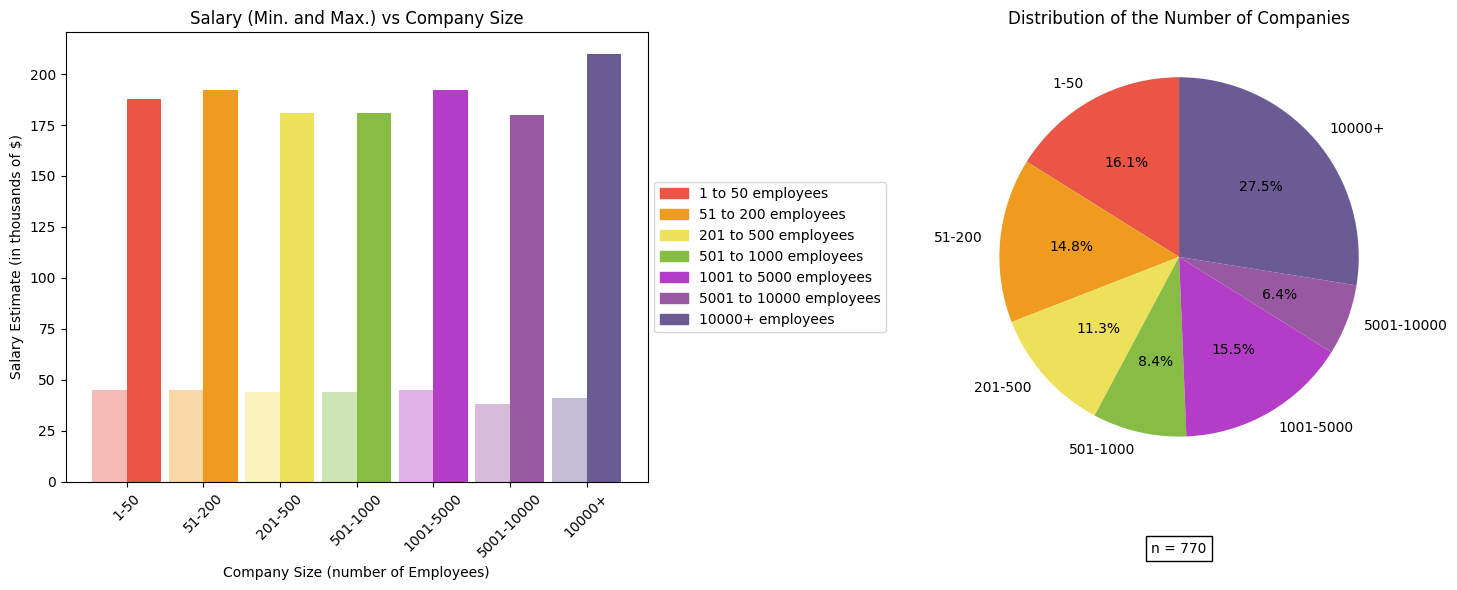

In [ ]:
!wget -O dsjob4.csv https://raw.githubusercontent.com/gabrield03/cs131/master/MiniProjectGroup7/ExtractData/SalaryBySizeSplit.csv
df5 = pd.read_csv("dsjob4.csv", encoding='latin-1')

# Categories for x-axis
categories = ['1 to 50 employees', '51 to 200 employees', '201 to 500 employees', '501 to 1000 employees',
              '1001 to 5000 employees', '5001 to 10000 employees', '10000+ employees']
new_x_labels = ['1-50', '51-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10000+']

# Quantiles for top 10% and bottom 10%
quantiles_min = []
quantiles_max = []
counts = []
total = 0

for category in categories:
    category_data = df5[df5['Company Size'] == category]
    total += category_data.shape[0]
    quantile_min = category_data['Min. Salary Estimate (in thousands of $)'].quantile(0.1)
    quantile_max = category_data['Max. Salary Estimate (in thousands of $)'].quantile(0.9)
    quantiles_min.append(quantile_min)
    quantiles_max.append(quantile_max)

    counts.append(category_data[(category_data['Min. Salary Estimate (in thousands of $)'] <= quantile_min) |
                                (category_data['Max. Salary Estimate (in thousands of $)'] >= quantile_max)].shape[0])


# Colors for the Bar and Pie Charts
max_salary_colors = [(0.917, 0.333, 0.271), (0.937, 0.608, 0.125), (0.929, 0.882, 0.357), (0.529, 0.737, 0.271),
                     (0.702, 0.239, 0.776), (0.596, 0.345, 0.635), (0.420, 0.357, 0.584)]

min_salary_colors = [clrs.to_rgb(color) for color in max_salary_colors]

# Make min. bars lighter
lighten_factor = 0.6
min_salary_colors_rgb = [
    (r + (1 - r) * lighten_factor, g + (1 - g) * lighten_factor, b + (1 - b) * lighten_factor)
    for r, g, b in min_salary_colors]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar Chart
width = 0.45
x = range(len(categories))

bars_min = []
bars_max = []
legend_colors = []
for i in range(len(categories)):
    bar1 = ax1.bar(i, quantiles_min[i], width, label='10% Min. Salary', color=min_salary_colors_rgb[i])
    bars_min.append(bar1)
    bar2 = ax1.bar(i + width, quantiles_max[i], width, label='90% Max. Salary', color=max_salary_colors[i])
    bars_max.append(bar2)
    legend_colors.append(plt.Rectangle((0, 0), 1, 1, color=max_salary_colors[i]))

ax1.set_title("Salary (Min. and Max.) vs Company Size")
ax1.set_xlabel('Company Size (number of Employees)')
ax1.set_ylabel('Salary Estimate (in thousands of $)')
ax1.set_xticks([i + width / 2 for i in x])
ax1.set_xticklabels(new_x_labels)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(legend_colors, categories, loc='center left', bbox_to_anchor=(1, 0.5))

# Pie chart
ax2.pie(counts, labels=new_x_labels, autopct='%1.1f%%', startangle=90, colors=max_salary_colors)
ax2.set_title('Distribution of the Number of Companies')
ax2.text(0.5, -0.15, f'n = {sum(counts)}', ha='center', va='center', transform=ax2.transAxes, fontsize=10,
         bbox=dict(facecolor='none', edgecolor='black'))

plt.tight_layout()
plt.show()

# Avg Min and Avg Max Salary By Experience Level

Bar Chart and Pie Chart for Salary vs Experience Level

Note: Ignores other job titles that *could* influence the plots

--2023-12-04 00:45:45--  https://raw.githubusercontent.com/gabrield03/cs131/master/MiniProjectGroup7/ExtractData/SalaryByExperienceSplit.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27904 (27K) [text/plain]
Saving to: ‘dsjob1.csv’

dsjob1.csv          100%[===================>]  27.25K  --.-KB/s    in 0.003s  

2023-12-04 00:45:45 (9.33 MB/s) - ‘dsjob1.csv’ saved [27904/27904]



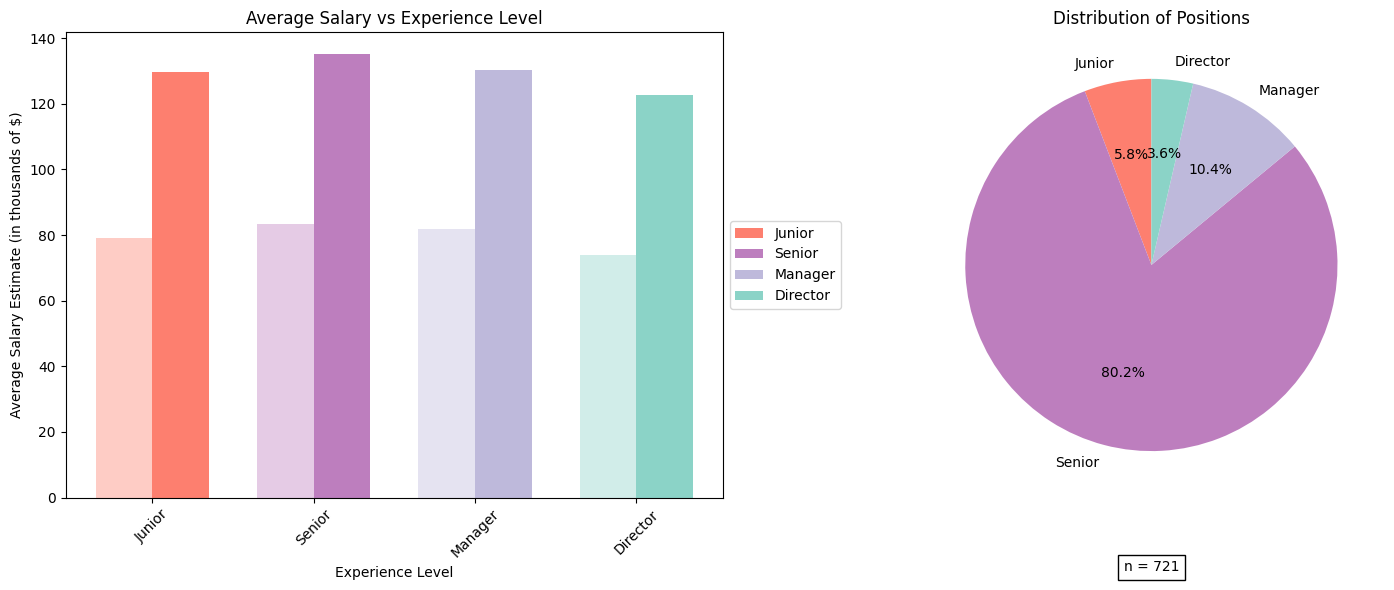

In [ ]:
!wget -O dsjob1.csv https://raw.githubusercontent.com/gabrield03/cs131/master/MiniProjectGroup7/ExtractData/SalaryByExperienceSplit.csv
df2 = pd.read_csv("dsjob1.csv",encoding='latin-1')

# Categories for x-axis: Account for jr and sr
categories = {
    'Junior': df2[df2['Experience Level'].str.contains('junior|jr', case=False)],
    'Senior': df2[df2['Experience Level'].str.contains('senior|sr', case=False)],
    'Manager': df2[df2['Experience Level'].str.contains('manager', case=False)],
    'Director': df2[df2['Experience Level'].str.contains('director', case=False)]
}

# Colors for the Bar and Pie Charts
category_colors_rgb = {'Junior': (0.992, 0.498, 0.435), 'Senior': (0.741, 0.494, 0.745), 'Manager': (0.745, 0.725, 0.859), 'Director': (0.545, 0.827, 0.780)}

avg_min_salaries = []
avg_max_salaries = []

for category, data in categories.items():
    avg_min_salaries.append(data['Min. Salary Estimate (in thousands of $)'].mean())
    avg_max_salaries.append(data['Max. Salary Estimate (in thousands of $)'].mean())

# Count data points in each category
counts = [len(data) for category, data in categories.items()]
total = sum(counts)

# Make min. bars lighter
lighten_factor = 0.6
min_salary_colors_rgb = {
    category: tuple((1 - lighten_factor) * val + lighten_factor for val in color)
    for category, color in category_colors_rgb.items()
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
x = range(len(categories))
width = 0.35

bars_min = []
bars_max = []
for i, (category, color) in enumerate(zip(categories.keys(), category_colors_rgb.values())):
    bar1 = ax1.bar(i, avg_min_salaries[i], width, label='Average Min Salary', color=min_salary_colors_rgb[category])
    bar2 = ax1.bar(i + width, avg_max_salaries[i], width, label='Average Max Salary', color=color)
    bars_min.append(bar1)
    bars_max.append(bar2)

ax1.set_xlabel('Experience Level')
ax1.set_ylabel('Average Salary Estimate (in thousands of $)')
ax1.set_title('Average Salary vs Experience Level')
ax1.set_xticks([i + width / 2 for i in x])
ax1.set_xticklabels(categories.keys())
ax1.tick_params(axis='x', rotation=45)
legend_colors = [clrs.to_rgba(rgb) for rgb in category_colors_rgb.values()]
ax1.legend([bars_max[i] for i in range(len(bars_max))], categories, loc='center left', bbox_to_anchor=(1, 0.5))

# Pie chart
pie_colors = [color for _, color in category_colors_rgb.items()]
ax2.pie(counts, labels=categories.keys(), autopct='%1.1f%%', startangle=90, colors=pie_colors)
ax2.set_title('Distribution of Positions')
ax2.text(0.5, -0.15, f'n = {total}', ha='center', va='center', transform=ax2.transAxes, fontsize=10, bbox=dict(facecolor='none', edgecolor='black'))

plt.tight_layout()
plt.show()

# Highest and Lowest Salary By Experience Level


Bar Chart and Pie Chart for Salary vs Experience Level


Note: Ignores other job titles that *could* influence the plots

--2023-12-04 00:45:46--  https://raw.githubusercontent.com/gabrield03/cs131/master/MiniProjectGroup7/ExtractData/SalaryByExperienceSplit.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27904 (27K) [text/plain]
Saving to: ‘dsjob2.csv’

dsjob2.csv          100%[===================>]  27.25K  --.-KB/s    in 0.003s  

2023-12-04 00:45:46 (8.84 MB/s) - ‘dsjob2.csv’ saved [27904/27904]



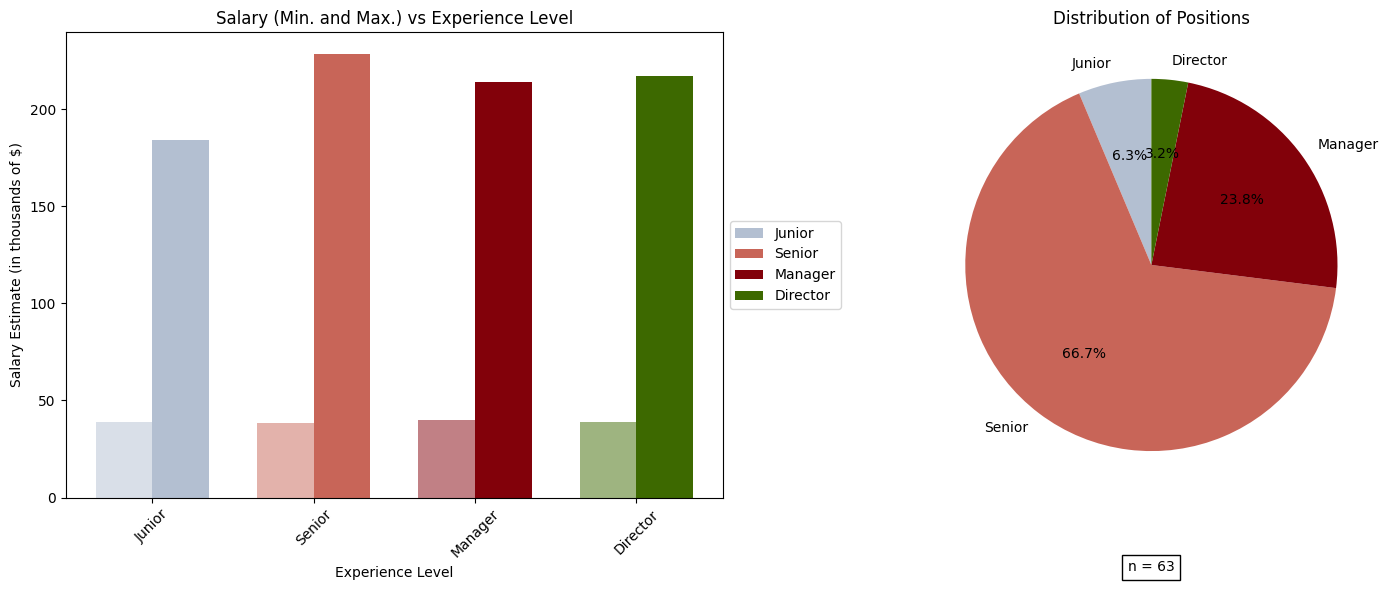

In [ ]:
!wget -O dsjob2.csv https://raw.githubusercontent.com/gabrield03/cs131/master/MiniProjectGroup7/ExtractData/SalaryByExperienceSplit.csv
df3 = pd.read_csv("dsjob2.csv",encoding='latin-1')

# Categories for x-axis
categories = {
    'Junior': df3[df3['Experience Level'].str.contains('junior|jr', case=False)],
    'Senior': df3[df3['Experience Level'].str.contains('senior|sr', case=False)],
    'Manager': df3[df3['Experience Level'].str.contains('manager', case=False)],
    'Director': df3[df3['Experience Level'].str.contains('director', case=False)]
}

lowest_10_percent_avg_min = []
highest_10_percent_avg_max = []

for category, data in categories.items():
    avg_min_salaries = data.groupby('Experience Level')['Min. Salary Estimate (in thousands of $)'].mean()
    avg_max_salaries = data.groupby('Experience Level')['Max. Salary Estimate (in thousands of $)'].mean()

    lowest_10_percent_avg_min.append(avg_min_salaries.sort_values().head(int(len(avg_min_salaries) * 0.1)).mean())
    highest_10_percent_avg_max.append(avg_max_salaries.sort_values(ascending=False).head(int(len(avg_max_salaries) * 0.1)).mean())

# Category colors
category_colors_rgb = { 'Junior': (0.702, 0.749, 0.819), 'Senior': (0.784, 0.396, 0.345),
                       'Manager': (0.510, 0.004, 0.041), 'Director': (0.239, 0.412, 0) }

#Count the data points
counts = [
    len(categories[category][
        (categories[category]['Min. Salary Estimate (in thousands of $)'] <= lowest_10_percent_avg_min[i]) |
        (categories[category]['Max. Salary Estimate (in thousands of $)'] >= highest_10_percent_avg_max[i])]
    )
    for i, (category, _) in enumerate(categories.items()) ]
total = sum(counts)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart and bars
x = range(len(categories))
width = 0.35

bars1 = ax1.bar(x, lowest_10_percent_avg_min, width, label='Lowest 10% Avg Min Salary',
                color=[clrs.to_rgb(rgb) for rgb in category_colors_rgb.values()])
bars2 = ax1.bar([i + width for i in x], highest_10_percent_avg_max, width, label='Highest 10% Avg Max Salary',
                color=[clrs.to_rgb(rgb) for rgb in category_colors_rgb.values()])

# Make min. bars lighter
lighten_factor = 0.5
for bar in bars1:
    r, g, b, _ = bar.get_facecolor()
    bar.set_facecolor((r + (1 - r) * lighten_factor, g + (1 - g) * lighten_factor, b + (1 - b) * lighten_factor, 1))

ax1.set_xlabel('Experience Level')
ax1.set_ylabel('Salary Estimate (in thousands of $)')
ax1.set_title('Salary (Min. and Max.) vs Experience Level')
ax1.set_xticks([i + width / 2 for i in x])
ax1.set_xticklabels(categories.keys())
ax1.tick_params(axis='x', rotation=45)
legend_colors = [clrs.to_rgba(rgb) for rgb in category_colors_rgb.values()]
ax1.legend([bars2[i] for i in range(len(bars2))], categories.keys(), loc='center left', bbox_to_anchor=(1, 0.5), labelcolor='black')

# Pie Chart
pie_colors = [clrs.to_rgba(rgb) for rgb in category_colors_rgb.values()]
ax2.pie(counts, labels=categories.keys(), autopct='%1.1f%%', startangle=90, colors=pie_colors)
ax2.set_title('Distribution of Positions')
ax2.text(0.5, -0.15, f'n = {total}', ha='center', va='center', transform=ax2.transAxes, fontsize=10, bbox=dict(facecolor='none', edgecolor='black'))

plt.tight_layout()
plt.show()

# Industry Type By Company Rating


Bar Chart and Pie Chart for Industry Type vs Company Rating


Note: Ignores values of -1 and records missing values

--2023-12-04 00:45:46--  https://raw.githubusercontent.com/gabrield03/cs131/master/MiniProjectGroup7/ExtractData/IndustryByRating.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65754 (64K) [text/plain]
Saving to: ‘dsjob3.csv’

dsjob3.csv          100%[===================>]  64.21K  --.-KB/s    in 0.02s   

2023-12-04 00:45:47 (2.71 MB/s) - ‘dsjob3.csv’ saved [65754/65754]



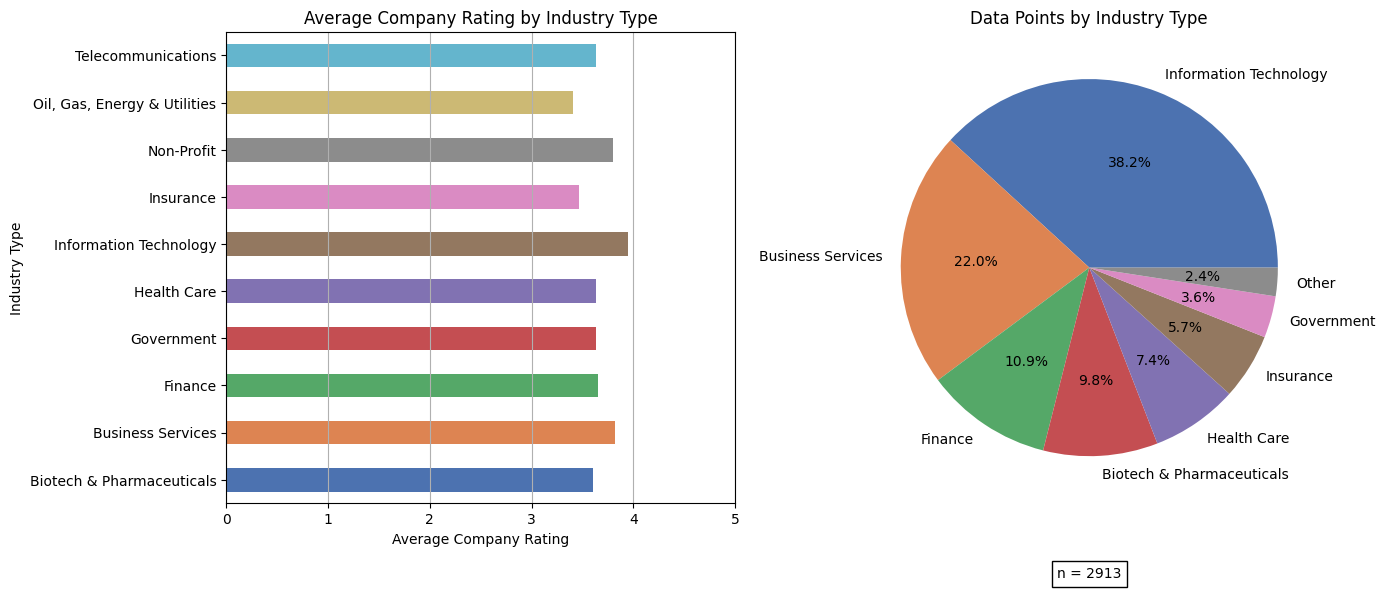

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

!wget -O dsjob3.csv https://raw.githubusercontent.com/gabrield03/cs131/master/MiniProjectGroup7/ExtractData/IndustryByRating.csv
df4 = pd.read_csv("dsjob3.csv", encoding='latin-1')

# Group by 'Industry Type' and calculate the average rating for each industry type
df4['Industry Type'] = df4['Industry Type'].replace('Oil - Gas - Energy & Utilities', 'Oil, Gas, Energy & Utilities')
avg_ratings = df4.groupby('Industry Type')['Company Rating'].mean()

# Colors for bars
bar_colors = [(0.298, 0.447, 0.690), (0.867, 0.518, 0.322), (0.333, 0.659, 0.408), (0.768, 0.305, 0.321), (0.505, 0.447, 0.698),
              (0.576, 0.470, 0.376), (0.854, 0.545, 0.764), (0.549, 0.549, 0.549), (0.800, 0.725, 0.454), (0.392, 0.710, 0.803)]

# Count the data points
data_points = df4['Industry Type'].value_counts()
percentages = data_points / data_points.sum() * 100

# Filter out percentages smaller than 3% - For "Other" category
small_percentages = percentages[percentages < 3]
other_percentage = small_percentages.sum()
if len(small_percentages) > 0:
    small_indices = small_percentages.index
    data_points['Other'] = data_points[small_indices].sum()
    data_points.drop(small_indices, inplace=True)

# Recalculate percentages after aggregating "Other"
percentages = data_points / data_points.sum() * 100

# Plot Bar Chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

avg_ratings.plot(kind='barh', color=bar_colors, ax=ax1)
ax1.set_xlabel('Average Company Rating')
ax1.set_ylabel('Industry Type')
ax1.set_title('Average Company Rating by Industry Type')
ax1.set_xticks([0, 1, 2, 3, 4, 5])
ax1.grid(axis='x')

# Colors for Pie Chart
filtered_bar_colors = bar_colors[:len(data_points)]
pie_colors = filtered_bar_colors + [(0.7, 0.7, 0.7)]  # Gray color for "Other"

# Plot Pie Chart
wedges, texts, autotexts = ax2.pie(data_points, labels=data_points.index, autopct='%1.1f%%', colors=pie_colors)
ax2.set_title('Data Points by Industry Type')

# Calculate n
total_data_points = sum(data_points)
total_text = f"n = {total_data_points}"
ax2.text(0.5, -0.15, total_text, ha='center', va='center', transform=ax2.transAxes, fontsize=10, bbox=dict(facecolor='none', edgecolor='black'))

plt.tight_layout()
plt.show()

# Salary Range by Location

Link to MinMaxSalaryByLocation.awk file: https://raw.githubusercontent.com/thipham00/cs131/master/MiniProjectGroup7/ExtractData/MinMaxSalaryByLocation.awk

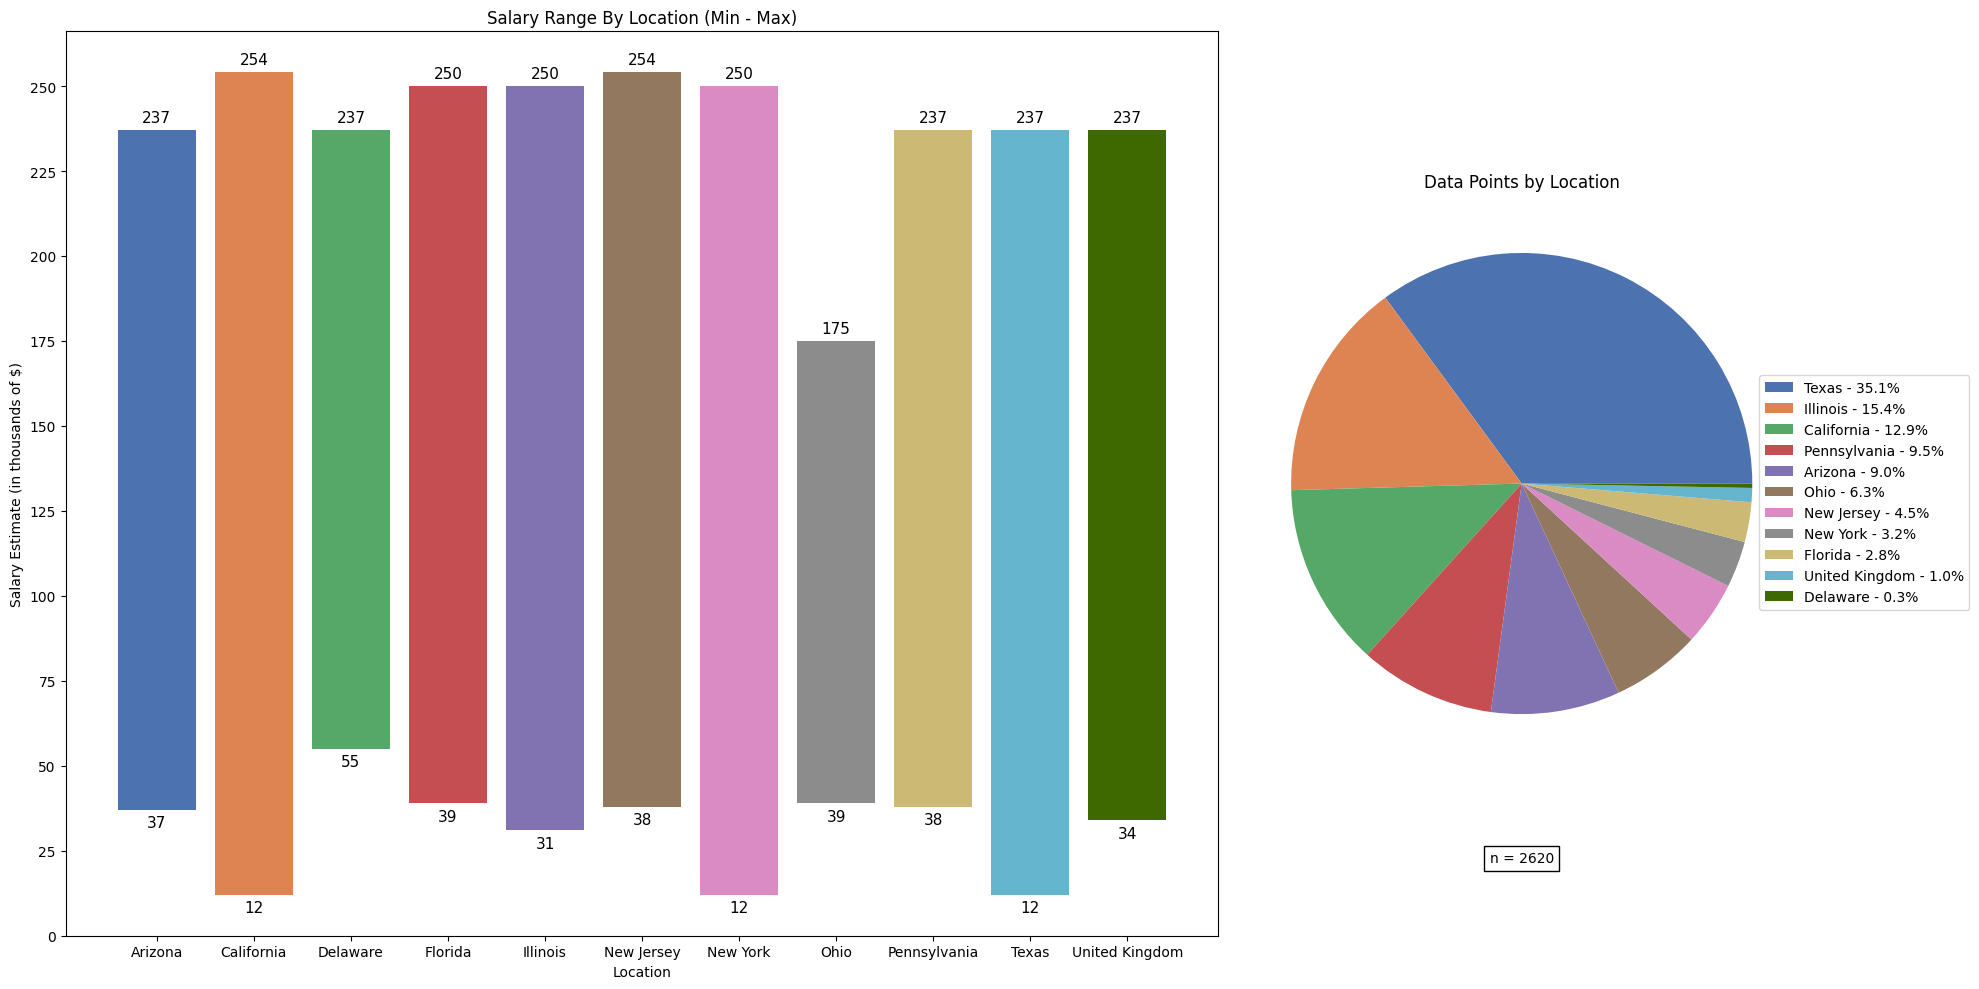

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files into a DataFrame without headers
df = pd.read_csv('https://raw.githubusercontent.com/thipham00/cs131/master/MiniProjectGroup7/ExtractData/MinMaxSalaryByLocation.csv', header=None, names=['Location', 'Salary'])
df1 = pd.read_csv('https://raw.githubusercontent.com/thipham00/cs131/master/MiniProjectGroup7/ExtractData/SalaryByLocation.csv', header=None, names=['Location', 'Salary'])

# Extract minimum and maximum salary values
df[['MinSalary', 'MaxSalary']] = df['Salary'].str.extract(r'\$(\d+)K\-\$(\d+)K')

# Extract data points for each location
locations = df1['Location'][1:].value_counts()

# Convert salary columns to numeric values
df['MinSalary'] = pd.to_numeric(df['MinSalary'])
df['MaxSalary'] = pd.to_numeric(df['MaxSalary'])

# Define RGB colors for each location
bar_colors = [(0.298, 0.447, 0.690), (0.867, 0.518, 0.322), (0.333, 0.659, 0.408), (0.768, 0.305, 0.321), (0.505, 0.447, 0.698),
              (0.576, 0.470, 0.376), (0.854, 0.545, 0.764), (0.549, 0.549, 0.549), (0.800, 0.725, 0.454), (0.392, 0.710, 0.803), (0.239, 0.412, 0)]

# Create figure with space for two subplots
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(20, 10), gridspec_kw={'width_ratios': [2, 1]})

# Plot the range plot with RGB-colored rectangles
for location, group in df.groupby('Location'):
    color = bar_colors[df['Location'].unique().tolist().index(location)]
    ax.bar(location, group['MaxSalary'].max() - group['MinSalary'].min(), bottom=group['MinSalary'].min(),
            color=color, edgecolor='none')  # Set edgecolor to 'none' to remove bar borders

    # Add text annotations for min and max values outside the bars
    ax.text(location, group['MinSalary'].min() - 6, f'{group["MinSalary"].min()}', ha='center', va='bottom', color='black', fontsize=11)
    ax.text(location, group['MaxSalary'].max() + 6, f'{group["MaxSalary"].max()}', ha='center', va='top', color='black', fontsize=11)

ax.set_title('Salary Range By Location (Min - Max)')
ax.set_xlabel('Location')
ax.set_ylabel('Salary Estimate (in thousands of $)')
ax.grid(False)
ax.set_ylim(0, ax.get_ylim()[1])
ax.set_yticks(range(0, int(ax.get_ylim()[1]) + 1, 25))

# Plot Pie Chart with the same colors as the bar chart
wedges, _, _ = ax2.pie(locations, labels=None, autopct='', colors=bar_colors)  # Set autopct to an empty string
ax2.set_title('Data Points by Location')

# Calculate n
total_data_points = sum(locations)
total_text = f"n = {total_data_points}"
ax2.text(0.5, -0.15, total_text, ha='center', va='center', transform=ax2.transAxes, fontsize=10, bbox=dict(facecolor='none', edgecolor='black'))

# Add legend for the bar chart and move it to the right
legend_labels = [f'{location} - {percentage:.1f}%' for location, percentage in zip(locations.index, (locations / total_data_points) * 100)]
ax2.legend(legend_labels, loc='upper left', bbox_to_anchor=(0.9, 0.7))  # Adjust the bbox_to_anchor parameter

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
